- credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito de LendingClub.com e 0 caso contrário.
- purpose: O propósito do empréstimo (recebe os valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business" e "all_other").
- int.rate: A taxa de juros do empréstimo, como proporção (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados pela LendingClub.com como sendo mais arriscados recebem taxas de juros mais altas.
- installment: as parcelas mensais devidas pelo mutuário, se o empréstimo for financiado.
- log.annual.inc: O logaritmo natural da renda anual autorreferida do mutuário.
- dti: O rácio dívida / rendimento do mutuário (montante da dívida dividido pelo rendimento anual).
- fico: A pontuação de crédito FICO do mutuário.
- days.with.cr.line: O número de dias que o mutuário teve uma linha de crédito.
- revol.bal: o saldo rotativo do mutuário (quantia não paga no final do ciclo de faturamento do cartão de crédito).
- revol.util: A taxa de utilização da linha de crédito do tomador (o valor da linha de crédito utilizada em relação ao crédito total disponível).
- inq.last.6mths: O número de pedidos do mutuário por credores nos últimos 6 meses.
- delinq.2yrs: O número de vezes que o mutuário tinha 30+ dias de atraso em um pagamento nos últimos 2 anos.
- pub.rec: O número de registros públicos depreciativos do mutuário (pedidos de falência, penhoras fiscais ou julgamentos).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
loans = pd.read_csv('./loan_data.csv')
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans['credit.policy'].unique()

array([1, 0])

In [5]:
loans.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5,0,u'FICO')

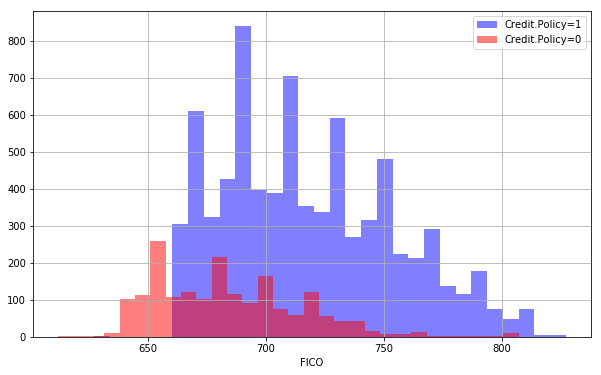

In [7]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5,0,u'FICO')

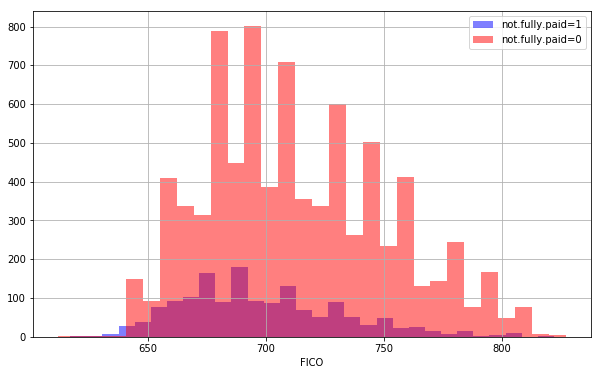

In [8]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

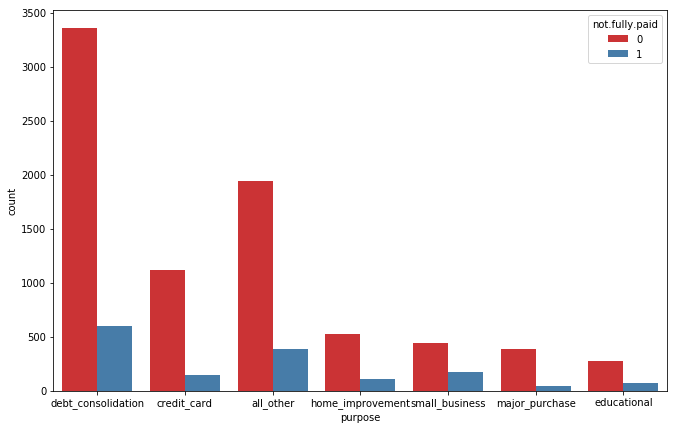

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

In [10]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()
final_data.purpose_credit_card.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

array([0, 1], dtype=uint64)

In [11]:
from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.20       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



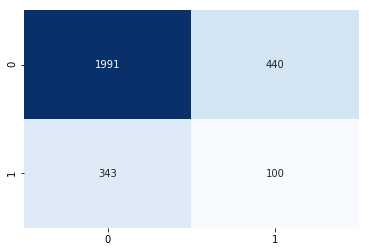

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

In [14]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(final_data.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

# Generate an image with the tree

* It takes some time, so it's commented. Uncomment to regenerate.

In [15]:
# dot_data = StringIO()  
# export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# img = Image(graph[0].create_png())
# graph[0].write_png('tree_loan_viz.png')

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.02      0.04       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



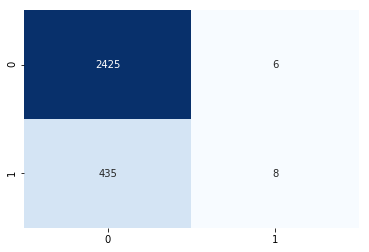

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

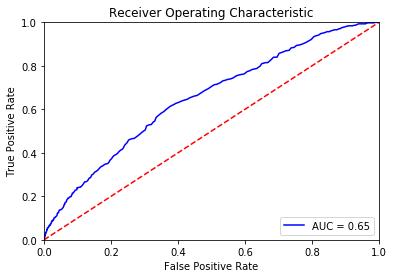

In [20]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.01      0.01       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.72      0.50      0.46      2874
weighted avg       0.81      0.85      0.78      2874



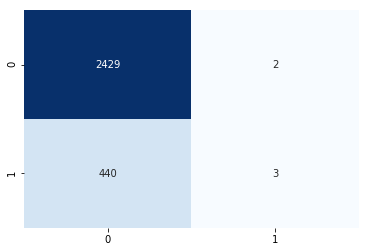

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

rfc2 = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1, class_weight="balanced")
rfc2.fit(X_train,y_train)
predictions = rfc2.predict(X_test)

print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

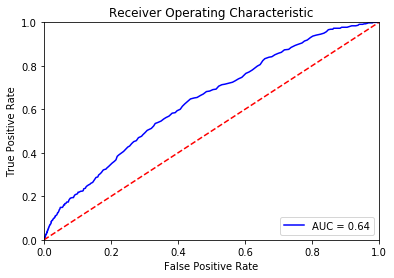

In [30]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()